Model to predict if a person suffers from heart disease or not  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


EXPLORATORY DATA ANLYSIS

Checking for null values in the dataset

In [5]:
df.apply(pd.isnull).sum().sort_values(ascending=False)
# No null values in the dataset

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

DATA VISUALISATION

Plotting the count of each target value to check if there is imbalance in the dataset

<AxesSubplot: xlabel='output', ylabel='count'>

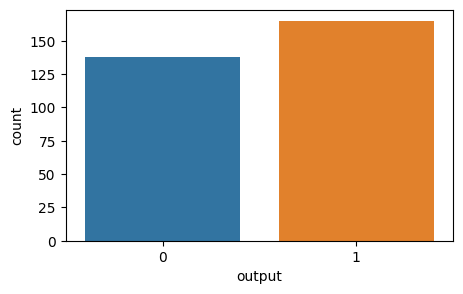

In [6]:
fig=plt.figure(figsize=(5,3))
sns.countplot(data=df,x='output')

Plot to check the relation between the target and the other features like age,Sex,Chol,restbp,Thal 

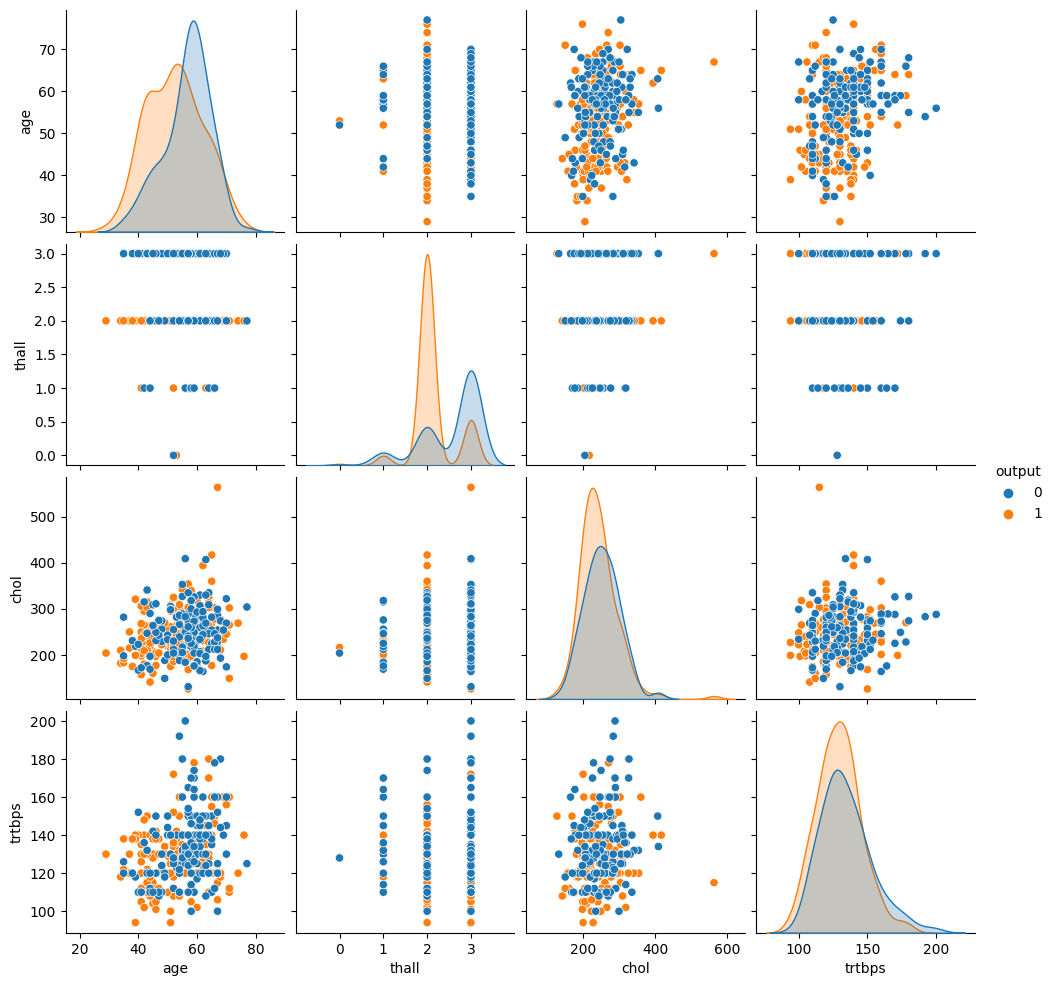

In [7]:
sns.pairplot(data=df[['age','output','thall','chol','trtbps']],hue='output')

Heatmap to get correlation of all the features

<AxesSubplot: >

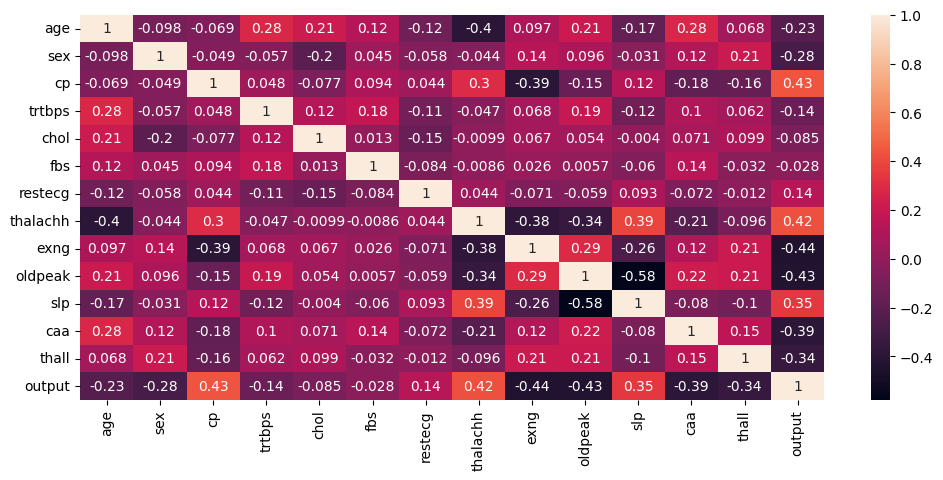

In [8]:
fig=plt.figure(figsize=(12,5),dpi=100)
sns.heatmap(df.corr(),annot=True)

Creating the Logistic Regression Model

Performing train-test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop('output',axis=1)
y=df['output']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegressionCV

In [16]:
model=LogisticRegressionCV()

In [17]:
model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [18]:
model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

<AxesSubplot: >

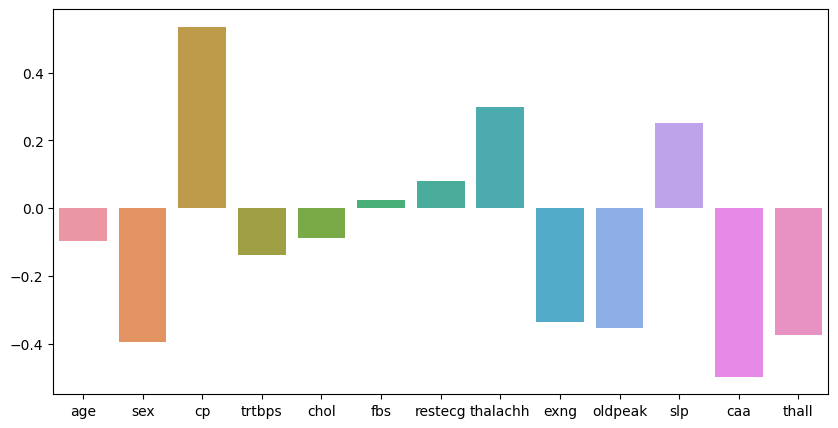

In [19]:
fig=plt.figure(figsize=(10,5))
coeff=pd.Series(index=X.columns,data=model.coef_[0])
sns.barplot(x=coeff.index,y=coeff.values)

Evaluation of the model

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [21]:
pred=model.predict(scaled_X_test)

Confusion Matrix

In [22]:
cm=confusion_matrix(pred,y_test)
cm

array([[12,  2],
       [ 3, 14]], dtype=int64)

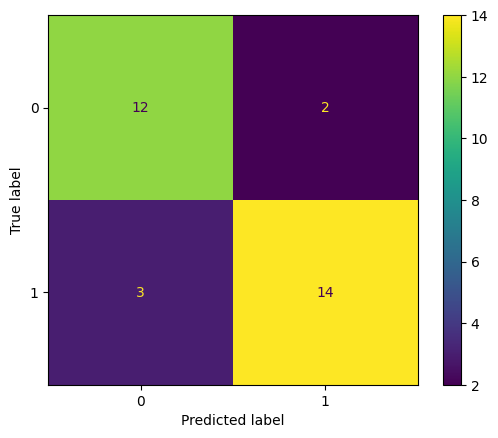

In [23]:
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [24]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



Performance curves

In [25]:
from sklearn.metrics import RocCurveDisplay,roc_curve,auc

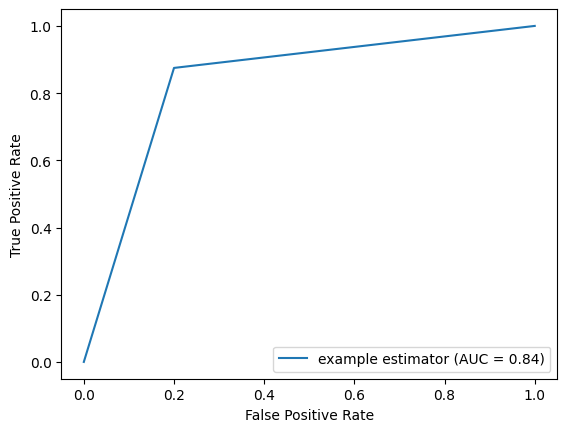

In [26]:
# fpr: false positive
# tpr: true positive
# auc: area under curve

fpr, tpr, thresholds =roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

Predicting future data

Patient comes in with the following features

age: 54

sex: 1.0

cp: 0.0

trestbps: 122.0

chol: 286.0

fbs: 0.0

restecg: 0.0

thalach: 116.0

exang: 1.0

oldpeak: 3.2

slope: 1.0

ca: 2.0

thal: 2.0

In [27]:
X.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [28]:
patient=[[54.,1.,0.,122.,286.,0.,0.,116.,1.,3.2,1.0,2.,2.]]
res=model.predict(patient)
res

array([0], dtype=int64)

With the given features there is no possibility of the patient to suffer from heart diseases